In [1]:
import sys
from pathlib import Path
REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))
import os

from data_processing.jets.preprocessing_header import AWK_SAVE_LOC, MAX_SAMPLE_LENGTH, LEN, MIN_TRACK_CELL_HITS, LEN_OUTPUT_DIRECTORY_NAME, LEN_DATASET_NAME, prefix_match, prefix_to_set
from data_processing.jets.jets_max_sample_length import find_global_max_sample_length

import re
from pathlib import Path
import json
import re
import matplotlib.pyplot as plt
import numpy as np


In [2]:
find_global_max_sample_length(-1)

split loop:   0%|          | 0/3 [00:00<?, ?it/s]

rho
['/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/train/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_37_train.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/train/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_5_train.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/train/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_25_train.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/train/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_16_train.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/train/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_11_train.parque

Processing train:   0%|          | 0/55 [00:00<?, ?it/s]

rho
['/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/val/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_36_val.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/val/rho/user.mswiatlo.40097513._000008.mltree.root_chunk_12_val.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/val/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_21_val.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/val/rho/user.mswiatlo.40097513._000008.mltree.root_chunk_10_val.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/val/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_16_val.parquet', '/fast_scratch_

Processing val:   0%|          | 0/55 [00:00<?, ?it/s]

rho
['/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/test/rho/user.mswiatlo.40097513._000008.mltree.root_chunk_1_test.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/test/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_19_test.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/test/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_15_test.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/test/rho/user.mswiatlo.40097513._000008.mltree.root_chunk_15_test.parquet', '/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/test/rho/user.mswiatlo.40097513._000008.mltree.root_chunk_4_test.parquet', '/fast_

Processing test:   0%|          | 0/55 [00:00<?, ?it/s]

Saved to: /fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/metadata/sample_length_calcs.json


In [4]:
json_loc = Path(AWK_SAVE_LOC(LEN)) / "metadata" / "sample_length_calcs.json"
print(json_loc)
with open(json_loc, 'r') as f:
    results = json.load(f)

results['train'][3][1]

/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_5/AwkwardArrs/deltaR=0.2/metadata/sample_length_calcs.json


'user.mswiatlo.40097513._000010.mltree.root_chunk_16_train.parquet'

In [5]:
len_list = []
max_list = []
for dir in ['test', 'train', 'val']:
    for lengths in results[dir]:
        len_list.extend(lengths[0])
        max_list.append(max(lengths[0]))

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


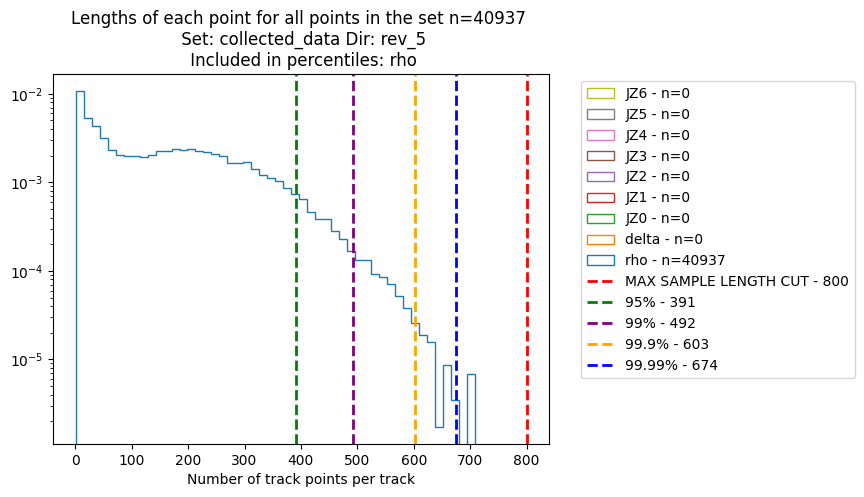

In [7]:
included_in_percentiles = ['rho']
specific_lens = []


lengths_dict = {i: [] for i in prefix_to_set.values()}

for key, value in results.items():
    for i in value:
        set_name = prefix_to_set[i[1].split('/')[-1][:len('user.mswiatlo.39955613')]]
        lengths_dict[set_name].extend(i[0])

for set_name in included_in_percentiles:
    specific_lens.extend(lengths_dict[set_name])


percentile_95 = int(np.percentile(specific_lens, 95))
percentile_99 = int(np.percentile(specific_lens, 99))
percentile_99_9 = int(np.percentile(specific_lens, 99.9))
percentile_99_99 = int(np.percentile(specific_lens, 99.99))


rates = lengths_dict.values()
included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(lengths_dict[i])}" for i in lengths_dict.keys()]

plt.title(f"Lengths of each point for all points in the set n={len(len_list)} \n Set: {LEN_DATASET_NAME} Dir: {LEN_OUTPUT_DIRECTORY_NAME}\n Included in percentiles: {' '.join(included_in_percentiles)}")
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(rates, label=labels, bins=50, histtype='step', fill=False, density=True)
plt.xlabel("Number of tracks")
plt.yscale("log")
plt.xlabel("Number of track points per track")
plt.axvline(x=MAX_SAMPLE_LENGTH, color='red', linestyle='--', linewidth=2, label=f'MAX SAMPLE LENGTH CUT - {MAX_SAMPLE_LENGTH}')
plt.axvline(x=percentile_95, color='green', linestyle='--', linewidth=2, label=f'95% - {percentile_95}')
plt.axvline(x=percentile_99, color='purple', linestyle='--', linewidth=2, label=f'99% - {percentile_99}')
plt.axvline(x=percentile_99_9, color='orange', linestyle='--', linewidth=2, label=f'99.9% - {percentile_99_9}')
plt.axvline(x=percentile_99_99, color='blue', linestyle='--', linewidth=2, label=f'99.99% - {percentile_99_99}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

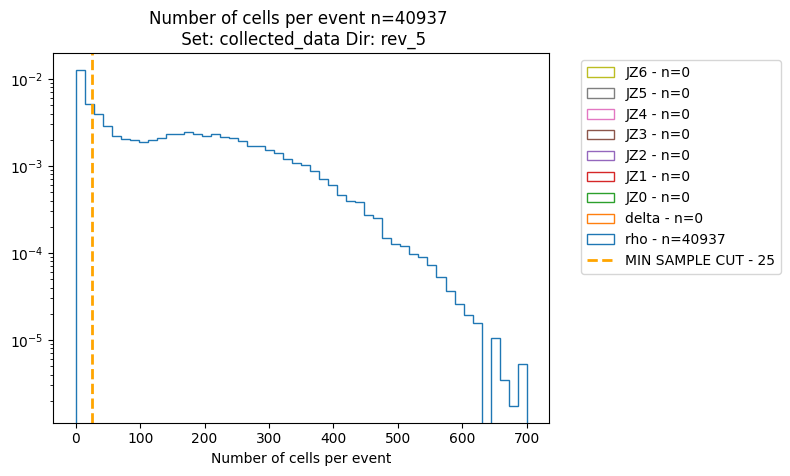

In [8]:
plt.title(f"Number of cells per event n={len(len_list)} \n Set: {LEN_DATASET_NAME} Dir: {LEN_OUTPUT_DIRECTORY_NAME}")

cells_lengths_dict = {i: [] for i in prefix_to_set.values()}

for directory, events_lists in results.items():
    for event in events_lists:
        set_name = prefix_to_set[event[1].split('/')[-1][:len('user.mswiatlo.39955613')]]
        cells_lengths_dict[set_name].extend(event[2])
rates = cells_lengths_dict.values()

included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(cells_lengths_dict[i])}" for i in cells_lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(rates, label=labels, bins=50, histtype='step', fill=False, density=True)
plt.yscale('log')
plt.xlabel("Number of cells per event")
plt.axvline(x=MIN_TRACK_CELL_HITS, color='orange', linestyle='--', linewidth=2, label=f'MIN SAMPLE CUT - {MIN_TRACK_CELL_HITS}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

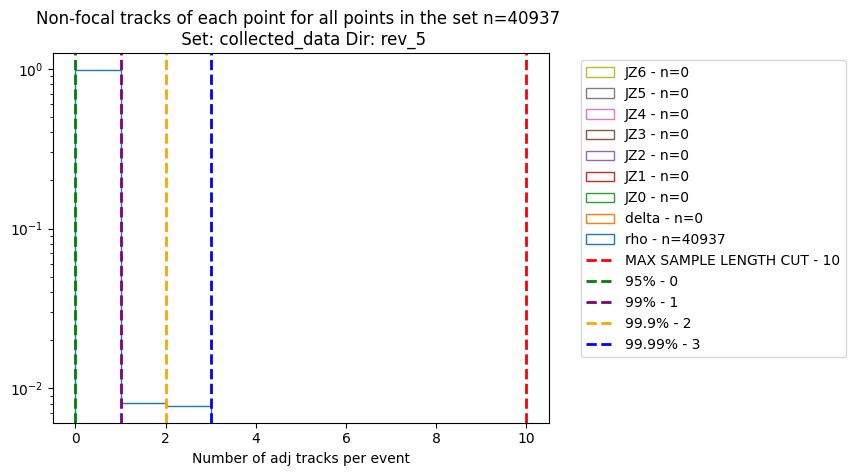

In [10]:
plt.title(f"Non-focal tracks of each point for all points in the set n={len(len_list)} \n Set: {LEN_DATASET_NAME} Dir: {LEN_OUTPUT_DIRECTORY_NAME}")
MAX_TRACK_ENERGIES = 10

specific_lens = []
included_in_percentiles = ['rho']
tracks_lengths_dict = {i: [] for i in prefix_to_set.values()}

for directory, events_lists in results.items():
    for event in events_lists:
        set_name = prefix_to_set[event[1][:len('user.mswiatlo.39955613')]]
        tracks_lengths_dict[set_name].extend(event[3])
rates = tracks_lengths_dict.values()

for set_name in included_in_percentiles:
    specific_lens.extend(tracks_lengths_dict[set_name])

included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(cells_lengths_dict[i])}" for i in tracks_lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.yscale('log')
plt.xlabel("Number of adj tracks per event")

percentile_95 = int(np.percentile(specific_lens, 95))
percentile_99 = int(np.percentile(specific_lens, 99))
percentile_99_9 = int(np.percentile(specific_lens, 99.9))
percentile_99_99 = int(np.percentile(specific_lens, 99.99))

plt.hist(rates, label=labels, bins=max(specific_lens), histtype='step', fill=False, density=True)


plt.axvline(x=MAX_TRACK_ENERGIES, color='red', linestyle='--', linewidth=2, label=f'MAX SAMPLE LENGTH CUT - {MAX_TRACK_ENERGIES}')
plt.axvline(x=percentile_95, color='green', linestyle='--', linewidth=2, label=f'95% - {percentile_95}')
plt.axvline(x=percentile_99, color='purple', linestyle='--', linewidth=2, label=f'99% - {percentile_99}')
plt.axvline(x=percentile_99_9, color='orange', linestyle='--', linewidth=2, label=f'99.9% - {percentile_99_9}')
plt.axvline(x=percentile_99_99, color='blue', linestyle='--', linewidth=2, label=f'99.99% - {percentile_99_99}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

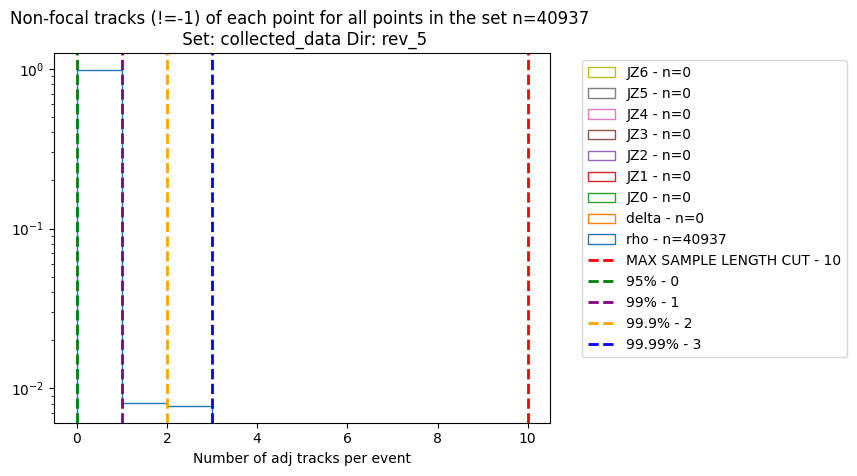

In [11]:
plt.title(f"Non-focal tracks (!=-1) of each point for all points in the set n={len(len_list)} \n Set: {LEN_DATASET_NAME} Dir: {LEN_OUTPUT_DIRECTORY_NAME}")
MAX_TRACK_ENERGIES = 10

specific_lens = []
included_in_percentiles = ['rho']
tracks_lengths_dict = {i: [] for i in prefix_to_set.values()}

for directory, events_lists in results.items():
    for event in events_lists:
        set_name = prefix_to_set[event[1][:len('user.mswiatlo.39955613')]]
        tracks_lengths_dict[set_name].extend(event[4])
rates = tracks_lengths_dict.values()

for set_name in included_in_percentiles:
    specific_lens.extend(tracks_lengths_dict[set_name])

included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(cells_lengths_dict[i])}" for i in tracks_lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.yscale('log')
plt.xlabel("Number of adj tracks per event")

percentile_95 = int(np.percentile(specific_lens, 95))
percentile_99 = int(np.percentile(specific_lens, 99))
percentile_99_9 = int(np.percentile(specific_lens, 99.9))
percentile_99_99 = int(np.percentile(specific_lens, 99.99))

plt.hist(rates, label=labels, bins=max(specific_lens), histtype='step', fill=False, density=True)


plt.axvline(x=MAX_TRACK_ENERGIES, color='red', linestyle='--', linewidth=2, label=f'MAX SAMPLE LENGTH CUT - {MAX_TRACK_ENERGIES}')
plt.axvline(x=percentile_95, color='green', linestyle='--', linewidth=2, label=f'95% - {percentile_95}')
plt.axvline(x=percentile_99, color='purple', linestyle='--', linewidth=2, label=f'99% - {percentile_99}')
plt.axvline(x=percentile_99_9, color='orange', linestyle='--', linewidth=2, label=f'99.9% - {percentile_99_9}')
plt.axvline(x=percentile_99_99, color='blue', linestyle='--', linewidth=2, label=f'99.99% - {percentile_99_99}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()